# Prediction on 2018 Russia WorldCup 

## Index
- 1.Purpose
- 2.Collecting dataset
- 3.Feature engineering
- 4.Modeling
- 5.Testing & prediction

## 1.Purpose

- To predict winner of the 2018 Russia World Cup
- 32 match has been played (Date 2018-06-25),I will use the 32 match data as a train data set to predict winner of the Russia WC!
- I will also use previous WC data and  players market values data to get more accurate prediction 
- After predicting 3rd round match, I will also predict the knockout stages as well 

In [2]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/6ErVNAb9pPc/maxresdefault.jpg")

## 2.Collecting dataset

training data set and testing data are given in my github
https://github.com/Hwnag-jihoon/Prediction-on-2018-Russia-WorldCup



- The data I collected were from mostly on FIFA's official web, and I also refered korean wikipedia (links:https://ko.wikipedia.org/wiki/FIFA_%EC%9B%94%EB%93%9C%EC%BB%B5)


In [3]:
from IPython.display import Image
Image(url= "http://kspn.co.kr/wp-content/uploads/2017/11/%EB%9F%AC%EC%8B%9C%EC%95%84.png")

In [4]:
from IPython.display import Image
Image(url= "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTZfMTA1/MDAxNTI5MTE3OTMzODI5.VMuZwC06hkXCLNk-BgkFPhwyB_vzjXCuZbllqr3Rw5Ug.09aBClr4fWbs2ldyHhs4HpKAO9pDu7mv6fmgzVFdDWMg.PNG.3832nirvana/%EA%B0%80%EC%B9%981.PNG?type=w800")

In [5]:
from IPython.display import Image
Image(url= "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTZfMTE1/MDAxNTI5MTE3OTMzODg0.w2zrZQLeOcX-ei-IGO-Ofj-X-Z1NU3yK00b_7yuticog.ammKJuEcgDCkwMl6mK-rg-7Y3jj7XrbzQizRctb5ZRgg.PNG.3832nirvana/%EA%B0%80%EC%B9%982.PNG?type=w800")

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [246]:
train = pd.read_csv('WC2018_train.csv')

In [245]:
test = pd.read_csv('test_third_round.csv')

In [247]:
train.head(32)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,11,59,145.64,65,1,Saudi Arabia,50,8,16.94,63,4,1.0,2.0,1
1,a,Uruguay,9,72,335.70,21,2,Egypt,65,2,177.50,31,3,-1.0,-2.0,1
2,b,Spain,5,99,930.60,6,2,Portugal,17,43,445.05,3,1,-12.0,-31.0,0
3,b,Iran,54,6,43.47,32,3,Morocco,44,10,116.51,40,4,-2.0,-2.0,1
4,c,Australia,46,9,45.23,39,4,France,7,96,972.45,9,1,1.0,6.0,2
5,c,Peru,37,15,34.67,11,2,Denmark,25,26,233.37,12,3,NaN,NaN,2
6,d,Argentina,4,140,629.10,4,1,Iceland,70,0,68.45,22,3,NaN,NaN,0
7,d,Croatia,27,23,327.60,17,2,Nigeria,32,18,121.37,50,4,NaN,NaN,1
8,e,Serbia,12,59,246.11,37,4,Costarica,29,19,36.14,26,3,NaN,NaN,2
9,e,Brazil,1,227,882.90,2,1,Switzerland,21,39,196.29,8,2,1.0,2.0,0


In [248]:
test.head(16)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,11,59,145.64,65,1,Uruguay,9,72,335.70,21,2,0.0,0.0,NaN
1,a,Saudi Arabia,50,8,16.94,63,4,Egypt,65,2,177.50,31,3,-5.0,-5.0,NaN
2,b,Portugal,17,43,445.05,3,1,Iran,54,6,43.47,32,3,2.0,5.0,NaN
3,b,Spain,5,99,930.60,6,2,Morocco,44,10,116.51,40,4,5.0,7.0,NaN
4,c,France,7,96,972.45,9,1,Denmark,25,26,233.37,12,3,4.0,9.0,NaN
5,c,Australia,46,9,45.23,39,4,Peru,37,15,34.67,11,2,NaN,NaN,NaN
6,d,Argentina,4,140,629.10,4,1,Nigeria,32,18,121.37,50,4,3.0,1.0,NaN
7,d,Iceland,70,0,68.45,22,3,Croatia,27,23,327.60,17,2,-3.0,-9.0,NaN
8,e,Brazil,1,227,882.90,2,1,Serbia,12,59,246.11,37,4,1.0,1.0,NaN
9,e,Switzerland,21,39,196.29,8,2,Costarica,29,19,36.14,26,3,0.0,1.0,NaN


## Data dictionary
- history with opponent W-L:
  +n = team1 has won n more games, -n = team2 has won n more games, 0 = equal,
  nan = no match has been played
- history with opponent goals:
  +n = team1 has scored n more goals, -n = team2 has scored n more goals, 0 = equal,
  nan = no match has been played
- result: 0= draw, 1 = team1 wins, 2 = team2 wins

In [249]:
train.shape

(32, 16)

In [250]:
test.shape

(16, 16)

In [251]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
Group                          32 non-null object
Team1                          32 non-null object
Team1 WC rank                  32 non-null int64
Team1 WC rank points           32 non-null int64
Team1 market val.              32 non-null float64
Team1 FIFA Rank                32 non-null int64
Team1 pot                      32 non-null int64
Team2                          32 non-null object
Team2 WC rank                  32 non-null int64
Team2 WC rank points           32 non-null int64
Team2 market val.              32 non-null float64
Team2 FIFA Rank                32 non-null int64
Team2 pot                      32 non-null int64
history with opponent W-L      21 non-null float64
history with opponent goals    21 non-null float64
result                         32 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 4.1+ KB


In [252]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
Group                          16 non-null object
Team1                          16 non-null object
Team1 WC rank                  16 non-null int64
Team1 WC rank points           16 non-null int64
Team1 market val.              16 non-null float64
Team1 FIFA Rank                16 non-null int64
Team1 pot                      16 non-null int64
Team2                          16 non-null object
Team2 WC rank                  16 non-null int64
Team2 WC rank points           16 non-null int64
Team2 market val.              16 non-null float64
Team2 FIFA Rank                16 non-null int64
Team2 pot                      16 non-null int64
history with opponent W-L      14 non-null float64
history with opponent goals    14 non-null float64
result                         0 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 2.1+ KB


### import python lib for visualization

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Bar chart for Categorical features

- Pot

In [254]:
def bar_chart(feature1,feature2):
    for i in range(0,32):
        if (train['result']== 1)[i].item():
            win = train[train['result']==1][feature1].value_counts()
            lose = train[train['result']==1][feature2].value_counts()
    
        elif (train['result']== 2)[i].item():
            win = train[train['result']== 2][feature2].value_counts()
            lose = train[train['result']== 2][feature1].value_counts()
    
        elif (train['result']== 0)[i].item():
            draw = train[train['result']== 0][feature1].value_counts()
            draw = train[train['result']== 0][feature2].value_counts()
        
    df = pd.DataFrame([win,draw,lose])
    df.index = ['Win','Draw','Lose']
    df.plot(kind='bar', stacked = True, figsize= (5,5))
    

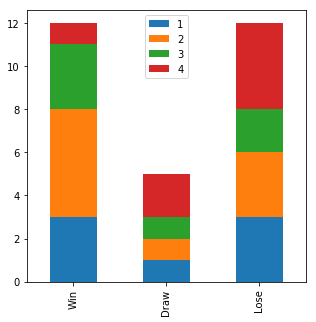

In [255]:
bar_chart('Team1 pot','Team2 pot')

- Seems like teams in Pot2 & Pot3 have won the 1st, 2nd match
- Teams in Pot1 had even number of wins and loses 
- Teams in Pot4 lost most of the games 

### 3.Feature Engineering
## 3.1 Binning
To get more grahical information, I needed to bind some data into groups

## - FIFA Rank, WC Rank:

1) 1~10 = 1 

2) 11~20 = 2

3) 21~30 = 3

4) 31~40 = 4

5) 41~50 = 5

6) 51~60 = 6

7) 60~ = 7

In [256]:
def get_rank(column):
    return int(column/10 + 1)

In [257]:
train['Team1 FIFA Rank'] = train['Team1 FIFA Rank'].apply(get_rank)
train['Team2 FIFA Rank'] = train['Team2 FIFA Rank'].apply(get_rank)
train['Team1 WC rank'] = train['Team1 WC rank'].apply(get_rank)
train['Team2 WC rank'] = train['Team2 WC rank'].apply(get_rank)
train

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,2,59,145.64,7,1,Saudi Arabia,6,8,16.94,7,4,1.0,2.0,1
1,a,Uruguay,1,72,335.70,3,2,Egypt,7,2,177.50,4,3,-1.0,-2.0,1
2,b,Spain,1,99,930.60,1,2,Portugal,2,43,445.05,1,1,-12.0,-31.0,0
3,b,Iran,6,6,43.47,4,3,Morocco,5,10,116.51,5,4,-2.0,-2.0,1
4,c,Australia,5,9,45.23,4,4,France,1,96,972.45,1,1,1.0,6.0,2
5,c,Peru,4,15,34.67,2,2,Denmark,3,26,233.37,2,3,NaN,NaN,2
6,d,Argentina,1,140,629.10,1,1,Iceland,8,0,68.45,3,3,NaN,NaN,0
7,d,Croatia,3,23,327.60,2,2,Nigeria,4,18,121.37,6,4,NaN,NaN,1
8,e,Serbia,2,59,246.11,4,4,Costarica,3,19,36.14,3,3,NaN,NaN,2
9,e,Brazil,1,227,882.90,1,1,Switzerland,3,39,196.29,1,2,1.0,2.0,0


- Panama, Iceland had no data on WC Rank, because it's thier first time to participate in the world cup. 

- I'll put them to 8(the lowest)

### bar_chart on FIFA Rank

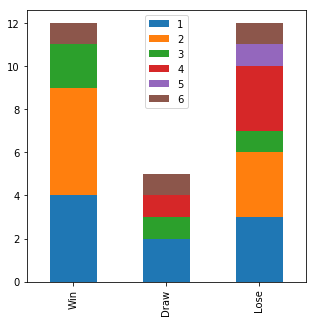

In [258]:
bar_chart('Team1 FIFA Rank','Team2 FIFA Rank')

- The chart shows that FIFA Rank does not have relevent meaning to result. 
- But the teams which are ranked in 31~40  have failed to win. 

### bar_chart on WC Rank

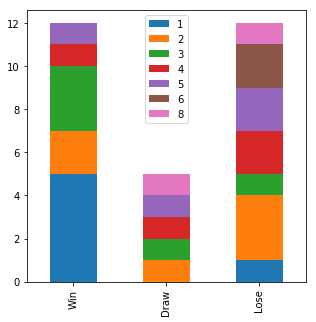

In [259]:
bar_chart('Team1 WC rank','Team2 WC rank')

- I thought WC Rank is meaninful data because the higher team ranks, more experience on WC competition
- Except for the second groups, It seems to be relevent

## - Market val.


In [260]:
def get_market_val(column):
    return int(column/50 + 1)

In [261]:
train['Team1 market val.'] = train['Team1 market val.'].apply(get_market_val)
train['Team2 market val.'] = train['Team2 market val.'].apply(get_market_val)

### bar chart on Market value

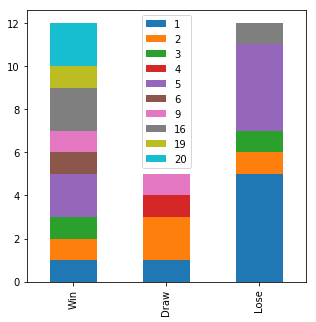

In [262]:
bar_chart('Team1 market val.','Team2 market val.')

- It seems to be obvious that teams that has higher market value has better chance of winning. 

## Now I wanted to find out how the WC Rank differnece & Market val difference affect on result 

### To see it I had to make new columns(WC rank diff, Market val diff)

In [263]:
train['WC Rank Diff'] = train['Team1 WC rank']- train['Team2 WC rank']
#train['WC Rank Diff'] = np.abs(train['WC Rank Diff'])
train['Market val Diff'] = train['Team1 market val.']- train['Team2 market val.']
#train['Market val Diff'] = np.abs(train['Market val Diff'])
train.head(32)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result,WC Rank Diff,Market val Diff
0,a,Russia,2,59,3,7,1,Saudi Arabia,6,8,1,7,4,1.0,2.0,1,-4,2
1,a,Uruguay,1,72,7,3,2,Egypt,7,2,4,4,3,-1.0,-2.0,1,-6,3
2,b,Spain,1,99,19,1,2,Portugal,2,43,9,1,1,-12.0,-31.0,0,-1,10
3,b,Iran,6,6,1,4,3,Morocco,5,10,3,5,4,-2.0,-2.0,1,1,-2
4,c,Australia,5,9,1,4,4,France,1,96,20,1,1,1.0,6.0,2,4,-19
5,c,Peru,4,15,1,2,2,Denmark,3,26,5,2,3,NaN,NaN,2,1,-4
6,d,Argentina,1,140,13,1,1,Iceland,8,0,2,3,3,NaN,NaN,0,-7,11
7,d,Croatia,3,23,7,2,2,Nigeria,4,18,3,6,4,NaN,NaN,1,-1,4
8,e,Serbia,2,59,5,4,4,Costarica,3,19,1,3,3,NaN,NaN,2,-1,4
9,e,Brazil,1,227,18,1,1,Switzerland,3,39,4,1,2,1.0,2.0,0,-2,14


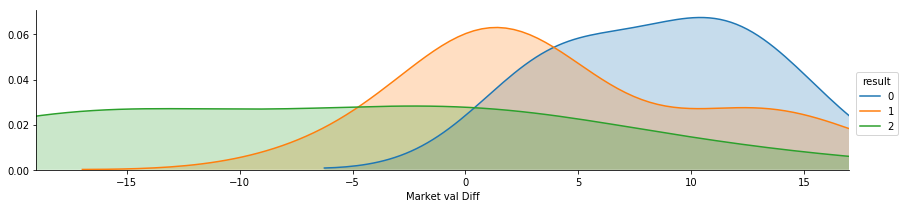

In [264]:
facet = sns.FacetGrid(train, hue="result",aspect=4)
facet.map(sns.kdeplot,'Market val Diff',shade= True)
facet.set(xlim=(train['Market val Diff'].min(), train['Market val Diff'].max()))
facet.add_legend()
 
plt.show() 

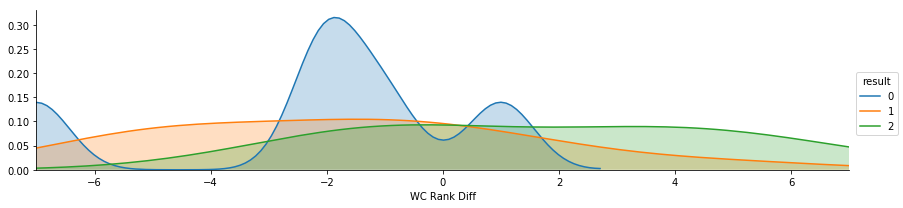

In [265]:
facet = sns.FacetGrid(train, hue="result",aspect=4)
facet.map(sns.kdeplot,'WC Rank Diff',shade= True)
facet.set(xlim=(train['WC Rank Diff'].min(), train['WC Rank Diff'].max()))
facet.add_legend()
 
plt.show() 

In [266]:
def bar_chart2(feature1):
    for i in range(0,32):
        if (train['result']== 1)[i].item():
            team1 = train[train['result']==1][feature1].value_counts()
               
        elif (train['result']== 2)[i].item():
            team2 = train[train['result']== 2][feature1].value_counts()
    
        elif (train['result']== 0)[i].item():
            draw = train[train['result']== 0][feature1].value_counts()
           
        
    df = pd.DataFrame([team1,draw,team2])
    df.index = ['Team1 win','Draw','Team2 win']
    df.plot(kind='bar', stacked = True, figsize= (5,5))

## Checking histories

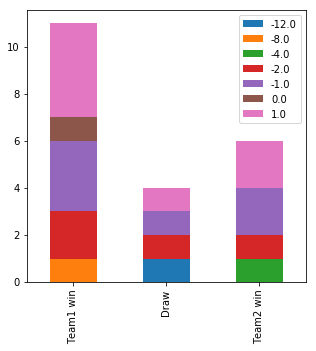

In [267]:
bar_chart2('history with opponent W-L')

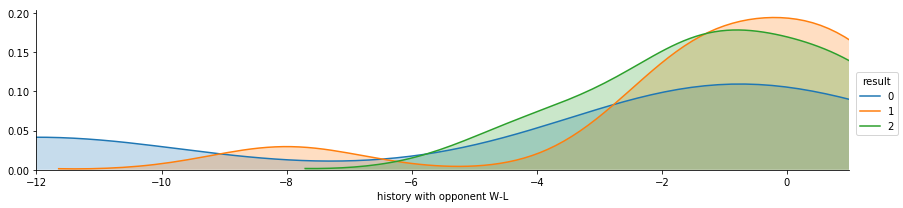

In [268]:
facet = sns.FacetGrid(train, hue="result",aspect=4)
facet.map(sns.kdeplot,'history with opponent W-L',shade= True)
facet.set(xlim=(train['history with opponent W-L'].min(), train['history with opponent W-L'].max()))
facet.add_legend()
 
plt.show() 

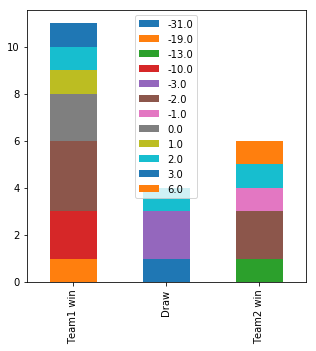

In [269]:
bar_chart2('history with opponent goals')

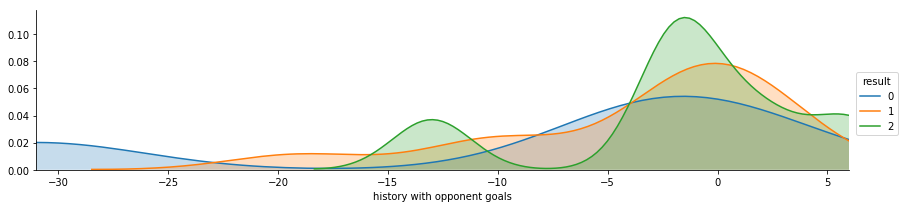

In [270]:
facet = sns.FacetGrid(train, hue="result",aspect=4)
facet.map(sns.kdeplot,'history with opponent goals',shade= True)
facet.set(xlim=(train['history with opponent goals'].min(), train['history with opponent goals'].max()))
facet.add_legend()
 
plt.show() 

- I was expecting to see the green on the left,orange on the right and blue on the middle of the graph. but it didn't happen  
- I can be inferred that there are many unexpected results in this worldcup

In [271]:
train.corr()

,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result,WC Rank Diff,Market val Diff
Team1 WC rank,1.000000,-0.700579,-0.678336,0.592958,0.702446,-0.394145,0.473483,0.543079,-0.065077,-0.292313,0.332772,0.468614,0.352167,0.815188,-0.733587
Team1 WC rank points,-0.700579,1.000000,0.828073,-0.492472,-0.611767,0.050258,-0.161184,-0.356940,-0.188351,0.010044,-0.389351,-0.490303,-0.304345,-0.428756,0.706851
Team1 market val.,-0.678336,0.828073,1.000000,-0.606816,-0.633321,0.182597,-0.218279,-0.378445,-0.146697,-0.036078,-0.584032,-0.645098,-0.494031,-0.499551,0.821179
Team1 FIFA Rank,0.592958,-0.492472,-0.606816,1.000000,0.670856,0.014732,0.105796,0.210807,0.136658,-0.081398,0.441368,0.510514,0.237393,0.326800,-0.486689
Team1 pot,0.702446,-0.611767,-0.633321,0.670856,1.000000,-0.274769,0.271995,0.363811,-0.076049,-0.199617,0.243658,0.359645,0.233473,0.571304,-0.596601
Team2 WC rank,-0.394145,0.050258,0.182597,0.014732,-0.274769,1.000000,-0.824549,-0.648886,0.488023,0.596464,0.216207,0.250148,-0.416066,-0.853612,0.507396
Team2 WC rank points,0.473483,-0.161184,-0.218279,0.105796,0.271995,-0.824549,1.000000,0.840372,-0.560095,-0.691587,0.117833,0.075322,0.369250,0.788009,-0.646428
Team2 market val.,0.543079,-0.356940,-0.378445,0.210807,0.363811,-0.648886,0.840372,1.000000,-0.636648,-0.693001,0.119112,0.180398,0.475754,0.716750,-0.838998
Team2 FIFA Rank,-0.065077,-0.188351,-0.146697,0.136658,-0.076049,0.488023,-0.560095,-0.636648,1.000000,0.727324,0.171163,0.162421,-0.289595,-0.344444,0.306273
Team2 pot,-0.292313,0.010044,-0.036078,-0.081398,-0.199617,0.596464,-0.691587,-0.693001,0.727324,1.000000,0.147829,0.124972,-0.302269,-0.541581,0.406045


# 4.Modeling 

- KNN(K Nearest Neighbors) 
- Decision Tree
- Random Forest
- Naive Bayes
- SVM(Support Vector Machine)

In [272]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
Group                          32 non-null object
Team1                          32 non-null object
Team1 WC rank                  32 non-null int64
Team1 WC rank points           32 non-null int64
Team1 market val.              32 non-null int64
Team1 FIFA Rank                32 non-null int64
Team1 pot                      32 non-null int64
Team2                          32 non-null object
Team2 WC rank                  32 non-null int64
Team2 WC rank points           32 non-null int64
Team2 market val.              32 non-null int64
Team2 FIFA Rank                32 non-null int64
Team2 pot                      32 non-null int64
history with opponent W-L      21 non-null float64
history with opponent goals    21 non-null float64
result                         32 non-null int64
WC Rank Diff                   32 non-null int64
Market val Diff                32 non-null int64
dtypes: 

##  Cross Validation (K-fold)

In [336]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)

In [337]:
train_data = pd.DataFrame(train, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot ','WC rank Diff','Market val Diff'])
train_data = train_data.fillna(0)
target = train['result']

# - kNN

In [338]:
clf = KNeighborsClassifier(n_neighbors =5)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5   0.5   0.5   0.625]


In [339]:
round(np.mean(score)*100, 2)

53.12

# - Decision Tree

In [340]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5  0.5  0.75 0.5 ]


In [341]:
round(np.mean(score)*100, 2)

56.25

# - Random Forest

In [342]:
clf = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5   0.375 0.625 0.5  ]


In [343]:
# Random Forest Score
round(np.mean(score)*100, 2)

50.0

# -Naive Bayes

In [344]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.125 0.5   0.625 0.625]


In [345]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

46.88

# - SVM

In [346]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75  0.625 0.625 0.625]


In [347]:
round(np.mean(score)*100,2)

65.62

# 5.Testing & Prediction

In [348]:
test.head()

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result,WC Rank Diff,Market val Diff
0,a,Russia,11,59,145.64,65,1,Uruguay,9,72,335.70,21,2,0.0,0.0,NaN,2,-190.06
1,a,Saudi Arabia,50,8,16.94,63,4,Egypt,65,2,177.50,31,3,-5.0,-5.0,NaN,-15,-160.56
2,b,Portugal,17,43,445.05,3,1,Iran,54,6,43.47,32,3,2.0,5.0,NaN,-37,401.58
3,b,Spain,5,99,930.60,6,2,Morocco,44,10,116.51,40,4,5.0,7.0,NaN,-39,814.09
4,c,France,7,96,972.45,9,1,Denmark,25,26,233.37,12,3,4.0,9.0,NaN,-18,739.08


In [349]:
test['WC Rank Diff'] = test['Team1 WC rank']- test['Team2 WC rank']

test['Market val Diff'] = test['Team1 market val.']- test['Team2 market val.']

test.head(16)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result,WC Rank Diff,Market val Diff
0,a,Russia,11,59,145.64,65,1,Uruguay,9,72,335.70,21,2,0.0,0.0,NaN,2,-190.06
1,a,Saudi Arabia,50,8,16.94,63,4,Egypt,65,2,177.50,31,3,-5.0,-5.0,NaN,-15,-160.56
2,b,Portugal,17,43,445.05,3,1,Iran,54,6,43.47,32,3,2.0,5.0,NaN,-37,401.58
3,b,Spain,5,99,930.60,6,2,Morocco,44,10,116.51,40,4,5.0,7.0,NaN,-39,814.09
4,c,France,7,96,972.45,9,1,Denmark,25,26,233.37,12,3,4.0,9.0,NaN,-18,739.08
5,c,Australia,46,9,45.23,39,4,Peru,37,15,34.67,11,2,NaN,NaN,NaN,9,10.56
6,d,Argentina,4,140,629.10,4,1,Nigeria,32,18,121.37,50,4,3.0,1.0,NaN,-28,507.73
7,d,Iceland,70,0,68.45,22,3,Croatia,27,23,327.60,17,2,-3.0,-9.0,NaN,43,-259.15
8,e,Brazil,1,227,882.90,2,1,Serbia,12,59,246.11,37,4,1.0,1.0,NaN,-11,636.79
9,e,Switzerland,21,39,196.29,8,2,Costarica,29,19,36.14,26,3,0.0,1.0,NaN,-8,160.15


In [350]:
test_data = pd.DataFrame(test, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot','WC Rank Diff','Market val Diff'])
test_data = test_data.fillna(0)

In [351]:
test_data.head(16)

,Team1 market val.,Team2 market val.,Team1 WC rank,Team2 WC rank,Team1 pot,Team2 pot,WC Rank Diff,Market val Diff
0,145.64,335.70,11,0.0,1,2,2,-190.06
1,16.94,177.50,50,0.0,4,3,-15,-160.56
2,445.05,43.47,17,0.0,1,3,-37,401.58
3,930.60,116.51,5,0.0,2,4,-39,814.09
4,972.45,233.37,7,0.0,1,3,-18,739.08
5,45.23,34.67,46,0.0,4,2,9,10.56
6,629.10,121.37,4,0.0,1,4,-28,507.73
7,68.45,327.60,70,0.0,3,2,43,-259.15
8,882.90,246.11,1,0.0,1,4,-11,636.79
9,196.29,36.14,21,0.0,2,3,-8,160.15


## - 3rd Round Results

In [371]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [372]:
submission = pd.DataFrame({
    'Team1':test['Team1'],
    'Team2':test['Team2'],
    'result':prediction})
submission.to_csv('submission_round3.csv')
submission.head(16)

,Team1,Team2,result
0,Russia,Uruguay,2
1,Saudi Arabia,Egypt,2
2,Portugal,Iran,0
3,Spain,Morocco,0
4,France,Denmark,0
5,Australia,Peru,0
6,Argentina,Nigeria,1
7,Iceland,Croatia,2
8,Brazil,Serbia,0
9,Switzerland,Costarica,0


- 1A: Uruguay     - 2A:Russia
- 1B: Spain       - 2B:Portugal
- 1C: France      -   2C:Denmark
- 1D: Croatia -2D:Nigeria
- 1E: Brazil  - 2E:Switzerland
- 1F: Mexico  - 2F:Germany
- 1G: England - 2G:Belgium
- 1H: Senegal - 2H:Columbia

# Top 16

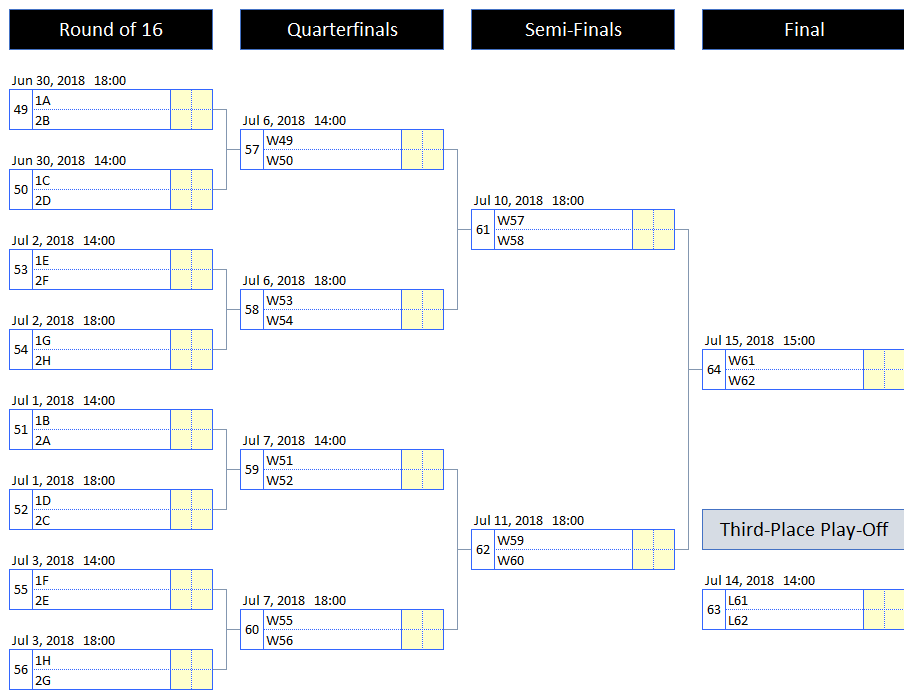

In [320]:
from IPython.display import Image
Image("final_tornament.png")

In [376]:
test_top_16 = pd.read_csv("test_top_16.csv")

In [384]:
test_top_16.head(8)

,Team1,Team1 WC rank,Team1 market val.,Team1 pot,Team2,Team2 WC rank,Team2 market val.,Team2 pot,WC Rank Diff,Market val Diff
0,Uruguay,9,335.70,2,Portugal,17,445.05,1,-8,-109.35
1,France,7,972.45,1,Nigeria,32,121.37,4,-25,851.08
2,Brazil,1,882.90,1,Germany,2,794.70,1,-1,88.20
3,England,6,786.60,2,Columbia,28,225.99,2,-22,560.61
4,Spain,5,930.60,2,Russia,11,145.64,1,-6,784.96
5,Croatia,27,327.60,2,Denmark,25,233.37,3,2,94.23
6,Mexico,13,139.14,2,Switzerland,21,196.29,2,-8,-57.15
7,Senegal,47,267.57,3,Belgium,14,678.60,1,33,-411.03


In [378]:
test_top_16['WC Rank Diff'] = test_top_16['Team1 WC rank']- test_top_16['Team2 WC rank']

test_top_16['Market val Diff'] =test_top_16['Team1 market val.']- test_top_16['Team2 market val.']

test_top_16.head(16)

,Team1,Team1 WC rank,Team1 market val.,Team1 pot,Team2,Team2 WC rank,Team2 market val.,Team2 pot,WC Rank Diff,Market val Diff
0,Uruguay,9,335.70,2,Portugal,17,445.05,1,-8,-109.35
1,France,7,972.45,1,Nigeria,32,121.37,4,-25,851.08
2,Brazil,1,882.90,1,Germany,2,794.70,1,-1,88.20
3,England,6,786.60,2,Columbia,28,225.99,2,-22,560.61
4,Spain,5,930.60,2,Russia,11,145.64,1,-6,784.96
5,Croatia,27,327.60,2,Denmark,25,233.37,3,2,94.23
6,Mexico,13,139.14,2,Switzerland,21,196.29,2,-8,-57.15
7,Senegal,47,267.57,3,Belgium,14,678.60,1,33,-411.03


In [379]:
test_data = pd.DataFrame(test_top_16, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot','WC Rank Diff','Market val Diff'])
test_data = test_data.fillna(0)

In [382]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [383]:
submission = pd.DataFrame({
    'Team1':test_top_16['Team1'],
    'Team2':test_top_16['Team2'],
    'result':prediction})
submission.to_csv('submission_top_16.csv')
submission.head(16)

,Team1,Team2,result
0,Uruguay,Portugal,2
1,France,Nigeria,1
2,Brazil,Germany,0
3,England,Columbia,1
4,Spain,Russia,2
5,Croatia,Denmark,1
6,Mexico,Switzerland,2
7,Senegal,Belgium,2


- If draw happens I'll choose the team with the better experience 
- So I will pick Brazil because they are ranked higher at WC Rank 
- I'll take the same policy to all draws(taking higher WC ranked Team)

# Top 8

In [385]:
test_top_8 = pd.read_csv("test_top_8.csv")

In [386]:
test_top_8['WC Rank Diff'] = test_top_8['Team1 WC rank']- test_top_8['Team2 WC rank']

test_top_8['Market val Diff'] =test_top_8['Team1 market val.']- test_top_8['Team2 market val.']

test_top_8.head(16)

,Team1,Team1 WC rank,Team1 market val.,Team1 pot,Team2,Team2 WC rank,Team2 market val.,Team2 pot,WC Rank Diff,Market val Diff
0,France,7,972.45,1,Portugal,17,445.05,1,-10,527.40
1,Brazil,1,882.90,1,England,6,786.60,2,-5,96.30
2,Russia,11,145.64,1,Croatia,27,327.60,2,-16,-181.96
3,Switzerland,21,196.29,2,Belgium,14,678.60,1,7,-482.31


In [387]:
test_data = pd.DataFrame(test_top_8, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot','WC Rank Diff','Market val Diff'])
test_data = test_data.fillna(0)

In [389]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [390]:
submission = pd.DataFrame({
    'Team1':test_top_8['Team1'],
    'Team2':test_top_8['Team2'],
    'result':prediction})
submission.to_csv('submission_top_8.csv')
submission.head()

,Team1,Team2,result
0,France,Portugal,0
1,Brazil,England,0
2,Russia,Croatia,2
3,Switzerland,Belgium,2


 - France, Brazil  will be on the semi-finals 

# Top 4

In [391]:
test_top_4 = pd.read_csv("test_top_4.csv")

In [392]:
test_top_4['WC Rank Diff'] = test_top_4['Team1 WC rank']- test_top_4['Team2 WC rank']

test_top_4['Market val Diff'] =test_top_4['Team1 market val.']- test_top_4['Team2 market val.']

test_top_4.head()

,Team1,Team1 WC rank,Team1 market val.,Team1 pot,Team2,Team2 WC rank,Team2 market val.,Team2 pot,WC Rank Diff,Market val Diff
0,France,7,972.45,1,Brazil,1,882.9,1,6,89.55
1,Croatia,27,327.60,2,Belgium,14,678.6,1,13,-351.00


In [393]:
test_data = pd.DataFrame(test_top_4, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot','WC Rank Diff','Market val Diff'])
test_data = test_data.fillna(0)

In [394]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [395]:
submission = pd.DataFrame({
    'Team1':test_top_4['Team1'],
    'Team2':test_top_4['Team2'],
    'result':prediction})
submission.to_csv('submission_top_4.csv')
submission.head()

,Team1,Team2,result
0,France,Brazil,1
1,Croatia,Belgium,2


# Final-round

In [396]:
test_final= pd.read_csv("test_final.csv")

In [397]:
test_final['WC Rank Diff'] = test_final['Team1 WC rank']- test_final['Team2 WC rank']

test_final['Market val Diff'] =test_final['Team1 market val.']- test_final['Team2 market val.']

test_final.head()

,Team1,Team1 WC rank,Team1 market val.,Team1 pot,Team2,Team2 WC rank,Team2 market val.,Team2 pot,WC Rank Diff,Market val Diff
0,France,7,972.45,1,Belgium,14,678.6,1,-7,293.85
1,Croatia,27,327.60,2,Brazil,1,882.9,1,26,-555.30


In [398]:
test_data = pd.DataFrame(test_final, columns= ['Team1 market val.','Team2 market val.','Team1 WC rank','Team2 WC rank ','Team1 pot','Team2 pot','WC Rank Diff','Market val Diff'])
test_data = test_data.fillna(0)

In [399]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [400]:
submission = pd.DataFrame({
    'Team1':test_final['Team1'],
    'Team2':test_final['Team2'],
    'result':prediction})
submission.to_csv('submission_final.csv')
submission.head()

,Team1,Team2,result
0,France,Belgium,1
1,Croatia,Brazil,2


# Final Result

- Winner : France
- 2nd Place : Belgium
- 3rd Place : Brazil
- 4th Place : Croatia

In [401]:
from IPython.display import Image
Image(url= "http://flags.fmcdn.net/data/flags/w580/fr.png")